This notebook contains tests for the SurfaceCode class - it has been used to generate data and plots but most importantly to verify correctness of the implementation. Since this is a testing and work in progress notebook, the code is not as clean as in other notebooks. The main purpose is to play around with things not that this is production level code.

Code Distances:   0%|          | 0/3 [00:00<?, ?it/s]

Gate Error Rates for L=3: 0it [00:00, ?it/s]

Gate Error Rates for L=5: 0it [00:00, ?it/s]

Gate Error Rates for L=7: 0it [00:00, ?it/s]

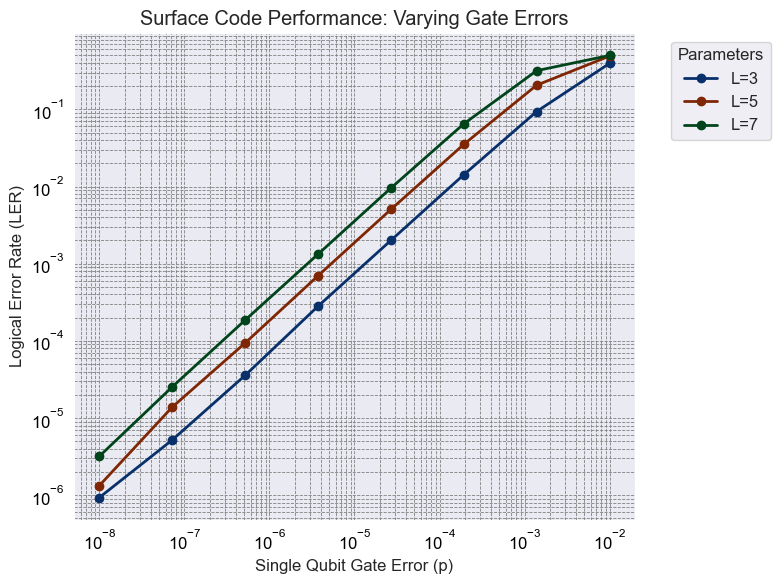

In [6]:
from surface_code import SurfaceCode
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

sns.set_style("darkgrid")
mpl.rcParams.update(
    {
        "font.size": 12,
        "grid.color": "0.5",
        "grid.linestyle": "--",
        "grid.linewidth": 0.6,
        "xtick.color": "black",
        "ytick.color": "black",
    }
)

Ls = [3, 5, 7]
p = np.logspace(-8, -2, 8)

# results = {}

# for L in tqdm(Ls, desc="Code Distances", position=0, leave=True):
#     SC = SurfaceCode(distance=L)
#     res_m = np.zeros(len(p))
#     for i, prob in tqdm(enumerate(p), desc=f"Gate Error Rates for L={L}", position=1, leave=False):
#         SC.build_in_stim_simple_noisy(rounds=L+1, logical_basis="Z", p=prob)
#         ler, syndrome, obs, preds = SC.run_with_pymatching(shots=7500_000, so=True)
#         res_m[i] = ler

#     results[L] = res_m

plt.figure(figsize=(8, 6))
cmaps = ['Blues', 'Oranges', 'Greens', 'Purples', 'Reds']
for i, (L, res) in enumerate(results.items()):
    cmap_name = cmaps[i % len(cmaps)]
    cmap = plt.get_cmap(cmap_name)
    colors = cmap(np.linspace(0.4, 1.0, len(p)))
    plt.plot(p, res, 
            label=f"L={L}", 
            marker="o", 
            color=colors[-1],
            linewidth=2)
plt.xlabel("Single Qubit Gate Error (p)")
plt.ylabel("Logical Error Rate (LER)")
plt.title("Surface Code Performance: Varying Gate Errors")
plt.yscale('log')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Parameters")
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


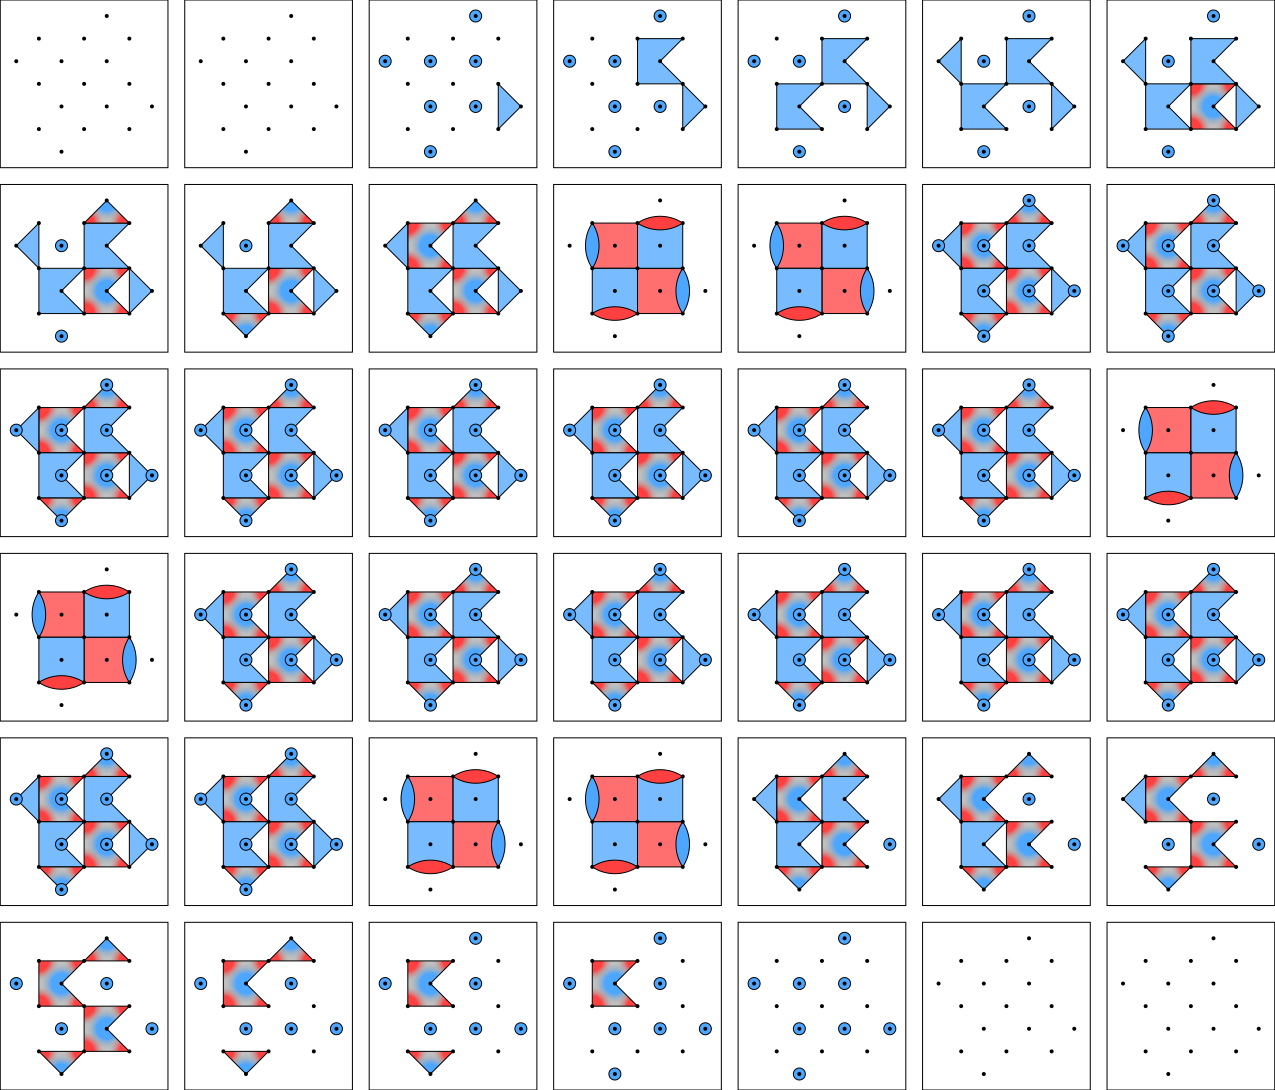

In [ ]:
import stim
surface_code_circuit = stim.Circuit.generated(
    "surface_code:rotated_memory_z",
    rounds=9,
    distance=3,
    after_clifford_depolarization=0.001,
    after_reset_flip_probability=0.001,
    before_measure_flip_probability=0.001,
    before_round_data_depolarization=0.001)
surface_code_circuit_diagram = surface_code_circuit.diagram()
# print(surface_code_circuit_diagram)
surface_code_circuit.without_noise().diagram("timeslice-svg")
from surface_code import SurfaceCode
SC = SurfaceCode(distance=3)
SC.build_in_stim_simple_noisy(rounds=4, logical_basis="Z", p=0.01)
SC.circuit.without_noise().diagram("detslice-svg")
# surface_code_circuit.diagram("matchgraph-3d")

In [2]:
from surface_code import SurfaceCode
SC = SurfaceCode(distance=3)
prob = 0.001
SC.build_in_stim_simple_noisy(rounds=3+1, logical_basis="Z", p=prob)
# svg = SC.diagram("timeline")

diagram = SC.diagram("timeline")
svg_str = diagram._repr_svg_()

with open("timeline.svg", "w", encoding="utf-8") as f:
    f.write(svg_str)

In [ ]:
import pickle

# Define the filename for the pickle file
filename = 'surface_code_results_3.pkl'

# Open the file in binary write mode and save the results dictionary
with open(filename, 'wb') as f:
    pickle.dump(results, f)

print(f"Data saved to {filename}")

Data saved to surface_code_results_2.pkl


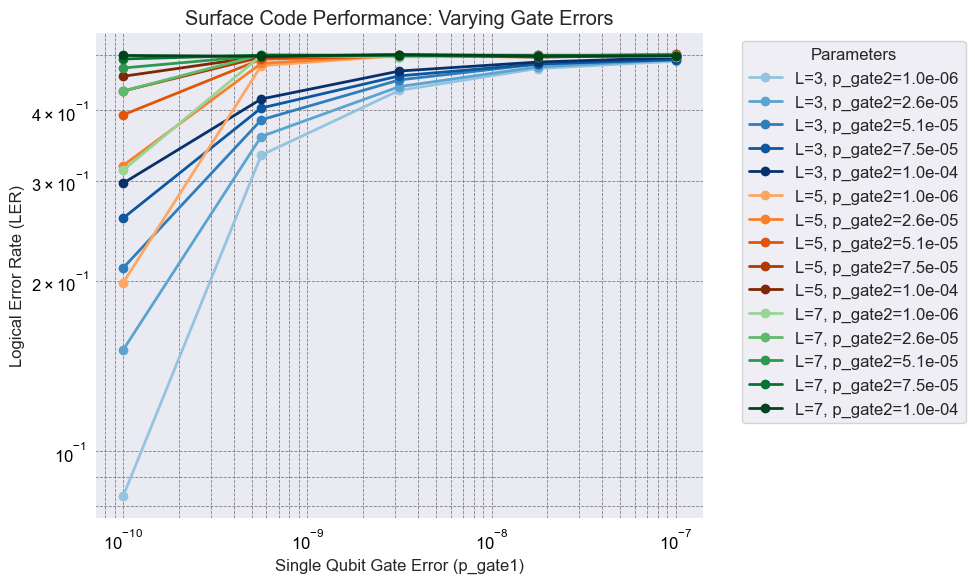

In [ ]:
plt.figure(figsize=(10, 6))

# Define distinct colormaps for each distance L
# Using sequential colormaps that are distinct from each other
cmaps = ['Blues', 'Oranges', 'Greens', 'Purples', 'Reds']

for i, (L, mat) in enumerate(results.items()):
    # Select a colormap for the current distance L
    cmap_name = cmaps[i % len(cmaps)]
    cmap = plt.get_cmap(cmap_name)
    
    # Generate a range of colors from the colormap for the different p_gate2 values
    # We start at 0.4 to avoid very light/invisible colors
    colors = cmap(np.linspace(0.4, 1.0, len(p_gate2)))
    
    for j, q in enumerate(p_gate2):
        plt.plot(p_gate1, mat[:, j], 
                 label=f"L={L}, p_gate2={q:.1e}", 
                 marker="o", 
                 color=colors[j],
                 linewidth=2)

plt.xlabel("Single Qubit Gate Error (p_gate1)")
plt.ylabel("Logical Error Rate (LER)")
plt.title("Surface Code Performance: Varying Gate Errors")
plt.yscale('log')
plt.xscale('log')
# Place legend outside to avoid cluttering the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Parameters")
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()